Step 0 : Import and reading Data

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [91]:
# Load weather and location data
weather_df = pd.read_csv("../../data/weather.csv")
location_df = pd.read_csv("../../data/locations.csv")

# Merge on location_id
df = pd.merge(weather_df, location_df, on="location_id")

In [92]:
df.shape


(142371, 28)

In [93]:
df.head(5)

location_id      date  weather_code (wmo code)  temperature_2m_max (Â°C)  \
0            0  1/1/2010                        1                     30.1   
1            0  1/2/2010                       51                     30.1   
2            0  1/3/2010                       51                     29.6   
3            0  1/4/2010                        2                     28.9   
4            0  1/5/2010                        1                     28.1   

   temperature_2m_min (Â°C)  temperature_2m_mean (Â°C)  \
0                     22.6                      26.0   
1                     23.7                      26.3   
2                     23.1                      26.0   
3                     23.1                      25.7   
4                     21.3                      24.6   

   apparent_temperature_max (Â°C)  apparent_temperature_min (Â°C)  \
0                           34.5                           25.0   
1                           33.9                           26.1   
2                           34.5                           26.2   
3                           31.7                           26.1   
4                           30.0                           22.9   

   apparent_temperature_mean (Â°C)  daylight_duration (s)  \
0                            29.0               42220.20   
1                            29.7               42225.71   
2                            29.9               42231.68   
3                            28.4               42238.11   
4                            26.2               42244.99   

   sunshine_duration (s)  precipitation_sum (mm)  rain_sum (mm)  \
0               38905.73                     0.0            0.0   
1               37451.01                     0.1            0.1   
2               33176.43                     0.6            0.6   
3               38289.20                     0.0            0.0   
4               39113.82                     0.0            0.0   

   precipitation_hours (h)  wind_speed_10m_max (km/h)  \
0                        0                       12.2   
1                        1                       13.0   
2                        3                       12.3   
3                        0                       17.0   
4                        0                       18.7   

   wind_gusts_10m_max (km/h)  wind_direction_10m_dominant (Â°)  \
0                       27.4                               19   
1                       27.0                               24   
2                       27.4                               17   
3                       34.6                              357   
4                       37.1                              353   

   shortwave_radiation_sum (MJ/mÂ²)  et0_fao_evapotranspiration (mm) sunrise  \
0                            20.92                             4.61   06:22   
1                            17.71                             3.91   06:22   
2                            17.76                             3.66   06:22   
3                            16.50                             3.75   06:23   
4                            23.61                             5.00   06:23   

  sunset  latitude  longitude  elevation  utc_offset_seconds      timezone  \
0  18:05  6.924429   79.90725          4               19800  Asia/Colombo   
1  18:06  6.924429   79.90725          4               19800  Asia/Colombo   
2  18:06  6.924429   79.90725          4               19800  Asia/Colombo   
3  18:07  6.924429   79.90725          4               19800  Asia/Colombo   
4  18:07  6.924429   79.90725          4               19800  Asia/Colombo   

   timezone_abbreviation city_name  
0                    530   Colombo  
1                    530   Colombo  
2                    530   Colombo  
3                    530   Colombo  
4                    530   Colombo

In [94]:
df.columns

Index(['location_id', 'date', 'weather_code (wmo code)',
       'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'temperature_2m_mean (Â°C)', 'apparent_temperature_max (Â°C)',
       'apparent_temperature_min (Â°C)', 'apparent_temperature_mean (Â°C)',
       'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_gusts_10m_max (km/h)',
       'wind_direction_10m_dominant (Â°)', 'shortwave_radiation_sum (MJ/mÂ²)',
       'et0_fao_evapotranspiration (mm)', 'sunrise', 'sunset', 'latitude',
       'longitude', 'elevation', 'utc_offset_seconds', 'timezone',
       'timezone_abbreviation', 'city_name'],
      dtype='object')

In [95]:
df.dtypes

location_id                          int64
date                                object
weather_code (wmo code)              int64
temperature_2m_max (Â°C)            float64
temperature_2m_min (Â°C)            float64
temperature_2m_mean (Â°C)           float64
apparent_temperature_max (Â°C)      float64
apparent_temperature_min (Â°C)      float64
apparent_temperature_mean (Â°C)     float64
daylight_duration (s)              float64
sunshine_duration (s)              float64
precipitation_sum (mm)             float64
rain_sum (mm)                      float64
precipitation_hours (h)              int64
wind_speed_10m_max (km/h)          float64
wind_gusts_10m_max (km/h)          float64
wind_direction_10m_dominant (Â°)      int64
shortwave_radiation_sum (MJ/mÂ²)    float64
et0_fao_evapotranspiration (mm)    float64
sunrise                             object
sunset                              object
latitude                           float64
longitude                          float64
ele

In [96]:
df.describe()

location_id  weather_code (wmo code)  temperature_2m_max (Â°C)  \
count  142371.000000            142371.000000            142371.000000   
mean       13.000000                44.891586                29.295854   
std         7.788908                22.840879                 3.352774   
min         0.000000                 0.000000                14.100000   
25%         6.000000                51.000000                27.700000   
50%        13.000000                53.000000                29.300000   
75%        20.000000                61.000000                31.300000   
max        26.000000                65.000000                40.300000   

       temperature_2m_min (Â°C)  temperature_2m_mean (Â°C)  \
count            142371.000000             142371.000000   
mean                 23.120601                 25.730017   
std                   3.165760                  2.954064   
min                   5.300000                 12.100000   
25%                  22.000000                 24.700000   
50%                  23.800000                 26.200000   
75%                  25.200000                 27.600000   
max                  30.300000                 32.700000   

       apparent_temperature_max (Â°C)  apparent_temperature_min (Â°C)  \
count                  142371.000000                  142371.000000   
mean                       33.560477                      26.362139   
std                         4.183799                       4.196010   
min                        11.000000                       2.000000   
25%                        31.400000                      25.100000   
50%                        33.900000                      27.600000   
75%                        36.300000                      29.100000   
max                        46.100000                      35.600000   

       apparent_temperature_mean (Â°C)  daylight_duration (s)  \
count                   142371.000000          142371.000000   
mean                        29.234477           43645.975220   
std                          3.837440            1099.470021   
min                          9.500000           41610.710000   
25%                         27.900000           42607.350000   
50%                         30.100000           43648.880000   
75%                         31.600000           44685.075000   
max                         37.700000           45676.100000   

       sunshine_duration (s)  precipitation_sum (mm)  rain_sum (mm)  \
count          142371.000000           142371.000000  142371.000000   
mean            34676.319743                5.442717       5.442717   
std              8910.054804               10.286371      10.286371   
min                 0.000000                0.000000       0.000000   
25%             32883.955000                0.200000       0.200000   
50%             38819.230000                1.800000       1.800000   
75%             39898.010000                6.500000       6.500000   
max             42231.340000              321.800000     321.800000   

       precipitation_hours (h)  wind_speed_10m_max (km/h)  \
count            142371.000000              142371.000000   
mean                  7.337955                  16.461730   
std                   6.861958                   6.828743   
min                   0.000000                   2.300000   
25%                   1.000000                  11.400000   
50%                   6.000000                  15.600000   
75%                  12.000000                  20.400000   
max                  24.000000                  60.700000   

       wind_gusts_10m_max (km/h)  wind_direction_10m_dominant (Â°)  \
count              142371.000000                    142371.000000   
mean                   37.118828                       177.723567   
std                    11.676963                        95.393165   
min                     9.400000                         0.000000   
25%                    28.100000          

Step 2: Data Preperation

Droping irrelevent columns and row
identyfying duplicated columns
Renaming columns 
Feature Creation


In [97]:
df['Rain(y/n)'] = df['rain_sum (mm)'] > 0  # True/False
df['Rain(y/n)'] = df['Rain(y/n)'].astype(int)  # Convert to 1/0 if needed


In [98]:
df.head()


location_id      date  weather_code (wmo code)  temperature_2m_max (Â°C)  \
0            0  1/1/2010                        1                     30.1   
1            0  1/2/2010                       51                     30.1   
2            0  1/3/2010                       51                     29.6   
3            0  1/4/2010                        2                     28.9   
4            0  1/5/2010                        1                     28.1   

   temperature_2m_min (Â°C)  temperature_2m_mean (Â°C)  \
0                     22.6                      26.0   
1                     23.7                      26.3   
2                     23.1                      26.0   
3                     23.1                      25.7   
4                     21.3                      24.6   

   apparent_temperature_max (Â°C)  apparent_temperature_min (Â°C)  \
0                           34.5                           25.0   
1                           33.9                           26.1   
2                           34.5                           26.2   
3                           31.7                           26.1   
4                           30.0                           22.9   

   apparent_temperature_mean (Â°C)  daylight_duration (s)  \
0                            29.0               42220.20   
1                            29.7               42225.71   
2                            29.9               42231.68   
3                            28.4               42238.11   
4                            26.2               42244.99   

   sunshine_duration (s)  precipitation_sum (mm)  rain_sum (mm)  \
0               38905.73                     0.0            0.0   
1               37451.01                     0.1            0.1   
2               33176.43                     0.6            0.6   
3               38289.20                     0.0            0.0   
4               39113.82                     0.0            0.0   

   precipitation_hours (h)  wind_speed_10m_max (km/h)  \
0                        0                       12.2   
1                        1                       13.0   
2                        3                       12.3   
3                        0                       17.0   
4                        0                       18.7   

   wind_gusts_10m_max (km/h)  wind_direction_10m_dominant (Â°)  \
0                       27.4                               19   
1                       27.0                               24   
2                       27.4                               17   
3                       34.6                              357   
4                       37.1                              353   

   shortwave_radiation_sum (MJ/mÂ²)  et0_fao_evapotranspiration (mm) sunrise  \
0                            20.92                             4.61   06:22   
1                            17.71                             3.91   06:22   
2                            17.76                             3.66   06:22   
3                            16.50                             3.75   06:23   
4                            23.61                             5.00   06:23   

  sunset  latitude  longitude  elevation  utc_offset_seconds      timezone  \
0  18:05  6.924429   79.90725          4               19800  Asia/Colombo   
1  18:06  6.924429   79.90725          4               19800  Asia/Colombo   
2  18:06  6.924429   79.90725          4               19800  Asia/Colombo   
3  18:07  6.924429   79.90725          4               19800  Asia/Colombo   
4  18:07  6.924429   79.90725          4               19800  Asia/Colombo   

   timezone_abbreviation city_name  Rain(y/n)  
0                    530   Colombo          0  
1                    530   Colombo          1  
2                    530   Colombo          1  
3                    530   Colombo          0  
4                    530   Colombo          0

In [99]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day



In [100]:
df.drop(columns=[
    'rain_sum (mm)', 'precipitation_sum (mm)', 'sunrise', 'sunset', 'date',
    'city_name', 'timezone', 'timezone_abbreviation', 'utc_offset_seconds', 'latitude', 'longitude'
], inplace=True)


In [101]:
df.dtypes

location_id                          int64
weather_code (wmo code)              int64
temperature_2m_max (Â°C)            float64
temperature_2m_min (Â°C)            float64
temperature_2m_mean (Â°C)           float64
apparent_temperature_max (Â°C)      float64
apparent_temperature_min (Â°C)      float64
apparent_temperature_mean (Â°C)     float64
daylight_duration (s)              float64
sunshine_duration (s)              float64
precipitation_hours (h)              int64
wind_speed_10m_max (km/h)          float64
wind_gusts_10m_max (km/h)          float64
wind_direction_10m_dominant (Â°)      int64
shortwave_radiation_sum (MJ/mÂ²)    float64
et0_fao_evapotranspiration (mm)    float64
elevation                            int64
Rain(y/n)                            int64
year                                 int32
month                                int32
day                                  int32
dtype: object

In [102]:
df=df.rename(columns={
    'temperature_2m_max (Â°C)': 'Temp_Max',
    'temperature_2m_min (Â°C)': 'Temp_Min',
    'temperature_2m_mean (Â°C)': 'Temp_Mean',
    'apparent_temperature_max (Â°C)': 'Apparent_Temp_Max',
    'apparent_temperature_min (Â°C)': 'Apparent_Temp_Min',
    'apparent_temperature_mean (Â°C)': 'Apparent_Temp_Mean',
    'daylight_duration (s)': 'Daylight_Duration',
    'sunshine_duration (s)': 'Sunshine_Duration',
    'precipitation_hours (h)': 'Precip_Hours',
    'wind_speed_10m_max (km/h)': 'Wind_Speed_Max',
    'wind_gusts_10m_max (km/h)': 'Wind_Gust_Max',
    'wind_direction_10m_dominant (Â°)': 'Wind_Dir_Dominant',
    'shortwave_radiation_sum (MJ/mÂ²)': 'Radiation_Sum',
    'et0_fao_evapotranspiration (mm)': 'Evapotranspiration',
    'year': 'Year',
    'month': 'Month',
    'day': 'Day',
    'Rain(y/n)': 'Rain'
}, inplace=False)



In [103]:
df.head()

location_id  weather_code (wmo code)  Temp_Max  Temp_Min  Temp_Mean  \
0            0                        1      30.1      22.6       26.0   
1            0                       51      30.1      23.7       26.3   
2            0                       51      29.6      23.1       26.0   
3            0                        2      28.9      23.1       25.7   
4            0                        1      28.1      21.3       24.6   

   Apparent_Temp_Max  Apparent_Temp_Min  Apparent_Temp_Mean  \
0               34.5               25.0                29.0   
1               33.9               26.1                29.7   
2               34.5               26.2                29.9   
3               31.7               26.1                28.4   
4               30.0               22.9                26.2   

   Daylight_Duration  Sunshine_Duration  Precip_Hours  Wind_Speed_Max  \
0           42220.20           38905.73             0            12.2   
1           42225.71           37451.01             1            13.0   
2           42231.68           33176.43             3            12.3   
3           42238.11           38289.20             0            17.0   
4           42244.99           39113.82             0            18.7   

   Wind_Gust_Max  Wind_Dir_Dominant  Radiation_Sum  Evapotranspiration  \
0           27.4                 19          20.92                4.61   
1           27.0                 24          17.71                3.91   
2           27.4                 17          17.76                3.66   
3           34.6                357          16.50                3.75   
4           37.1                353          23.61                5.00   

   elevation  Rain  Year  Month  Day  
0          4     0  2010      1    1  
1          4     1  2010      1    2  
2          4     1  2010      1    3  
3          4     0  2010      1    4  
4          4     0  2010      1    5

In [104]:
df.isna().sum()

location_id                0
weather_code (wmo code)    0
Temp_Max                   0
Temp_Min                   0
Temp_Mean                  0
Apparent_Temp_Max          0
Apparent_Temp_Min          0
Apparent_Temp_Mean         0
Daylight_Duration          0
Sunshine_Duration          0
Precip_Hours               0
Wind_Speed_Max             0
Wind_Gust_Max              0
Wind_Dir_Dominant          0
Radiation_Sum              0
Evapotranspiration         0
elevation                  0
Rain                       0
Year                       0
Month                      0
Day                        0
dtype: int64

In [105]:
df.duplicated().sum()

np.int64(0)

In [106]:
df.query('Temp_Max > 50 or Temp_Min < -50').shape

(0, 21)

Feature Understanding 
(unveriable analysis)

ploting feature distribution
  1 Histrogram
  2 KDE
  3 Boxplot

In [107]:
features_to_analyze = [
    'Temp_Max', 'Temp_Min', 'Temp_Mean',
    'Apparent_Temp_Max', 'Apparent_Temp_Min', 'Apparent_Temp_Mean',
    'Wind_Speed_Max', 'Wind_Gust_Max',
    'Radiation_Sum', 'Daylight_Duration', 'Sunshine_Duration',
    'Precip_Hours', 'Evapotranspiration',
]


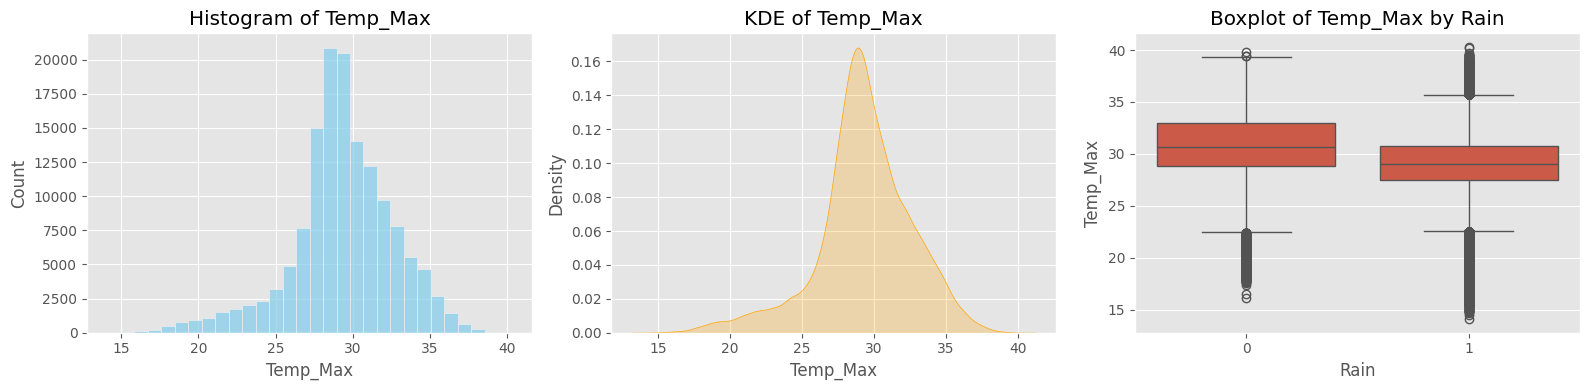

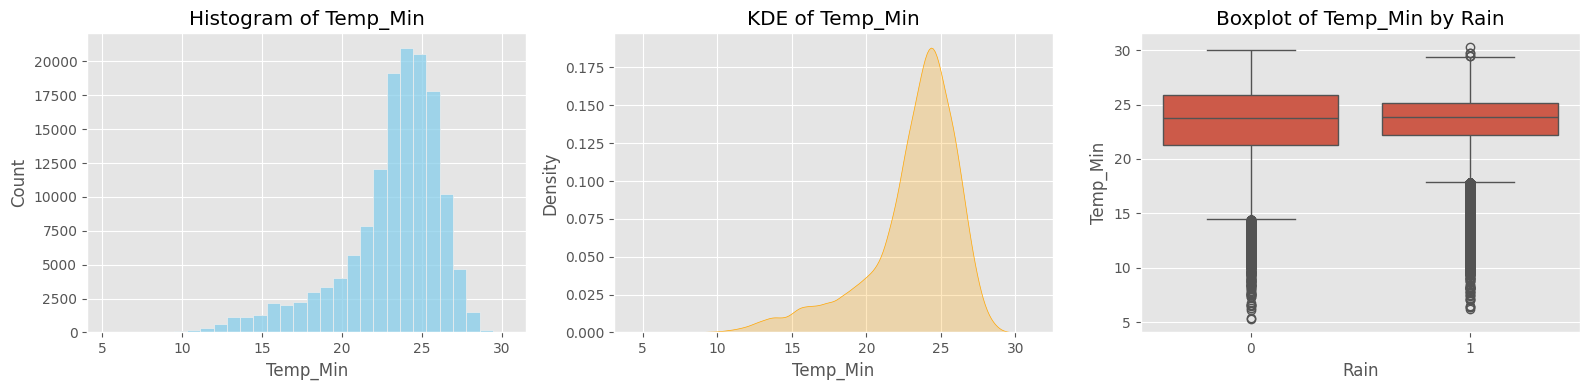

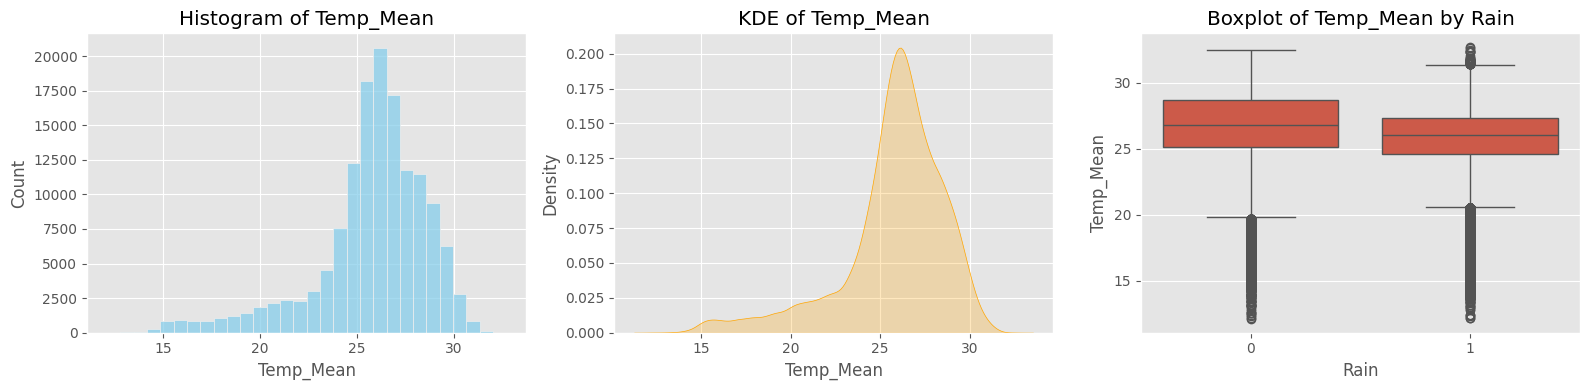

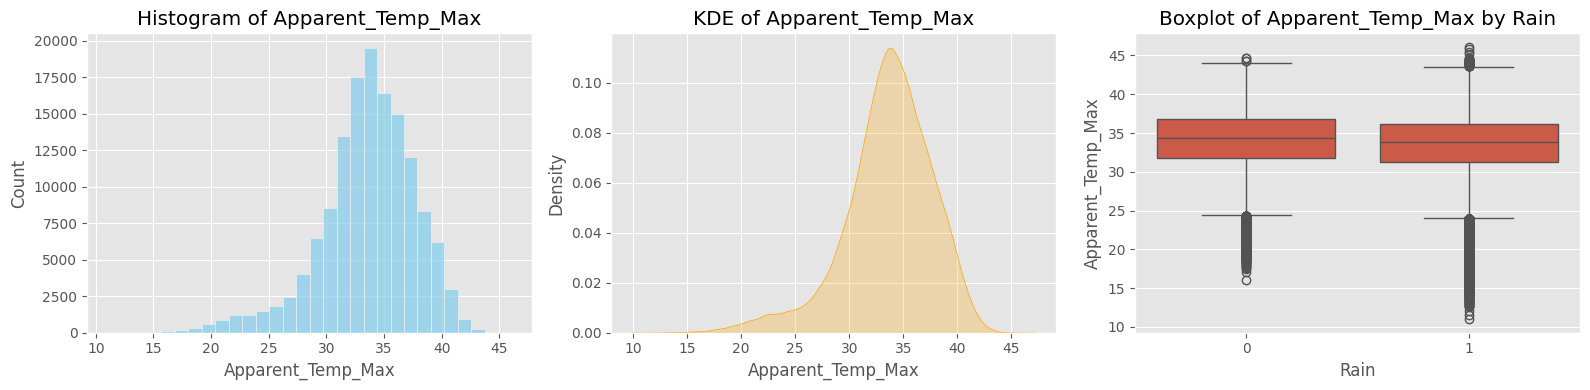

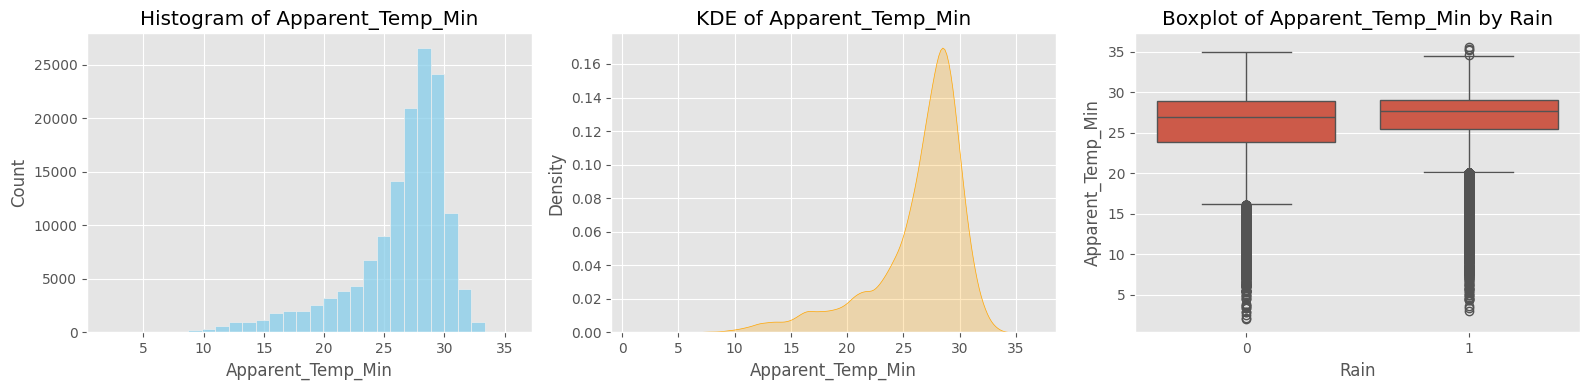

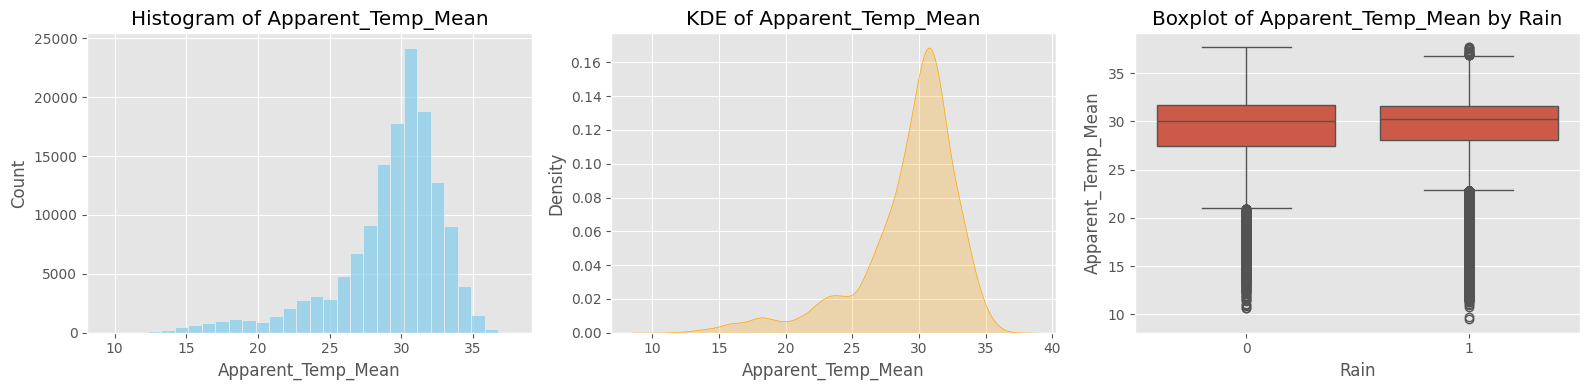

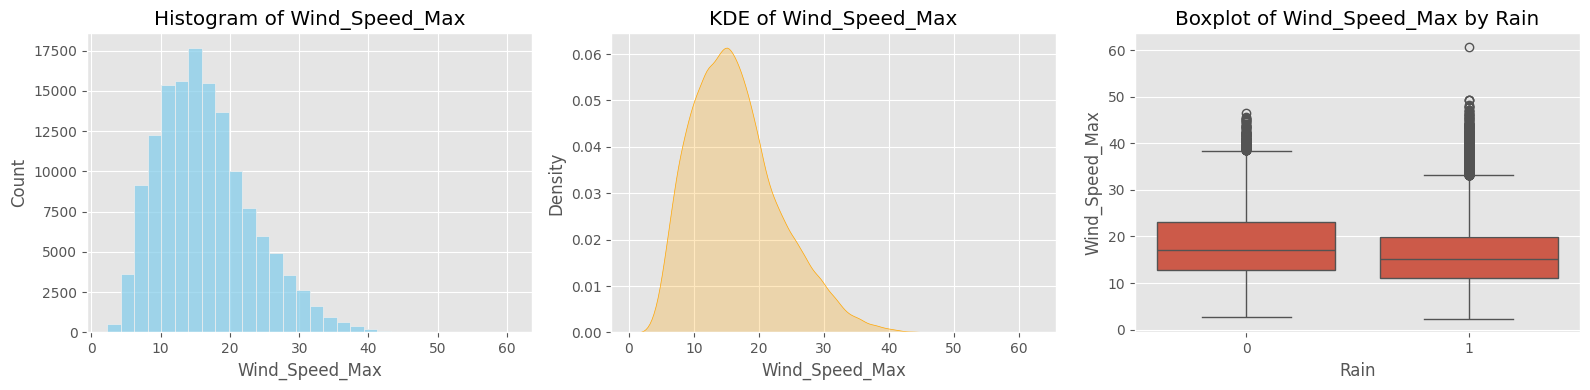

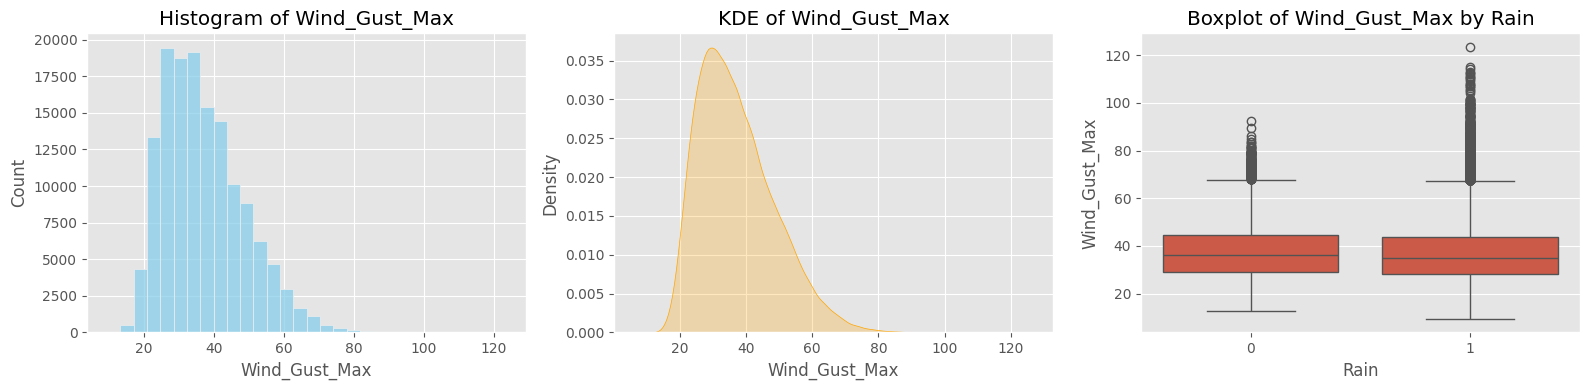

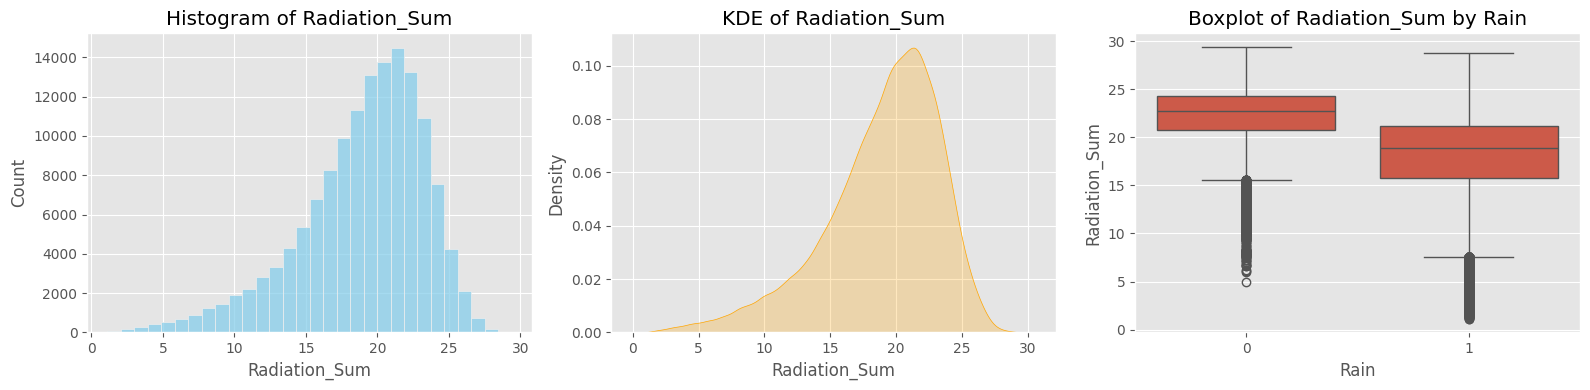

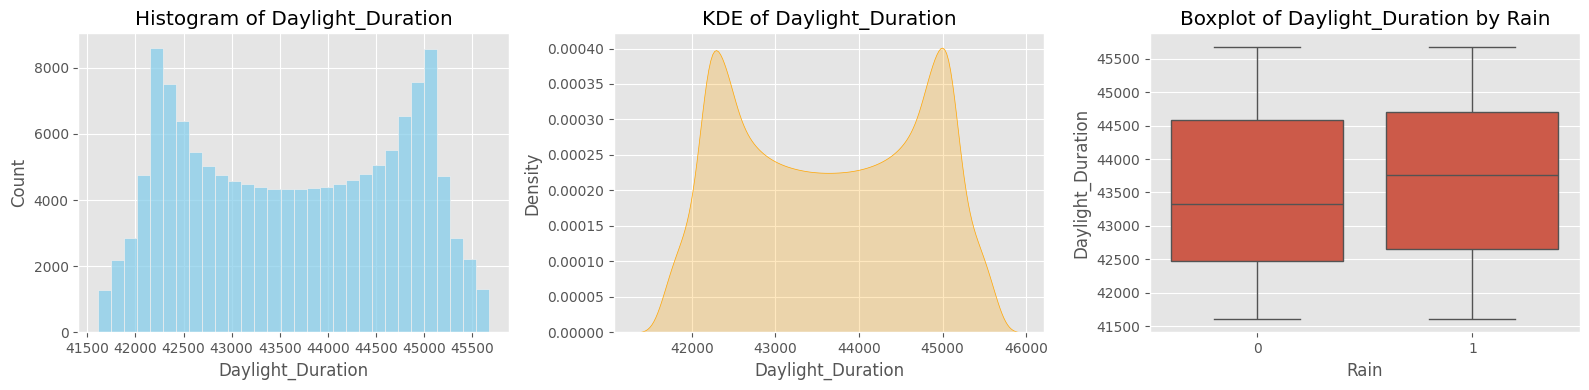

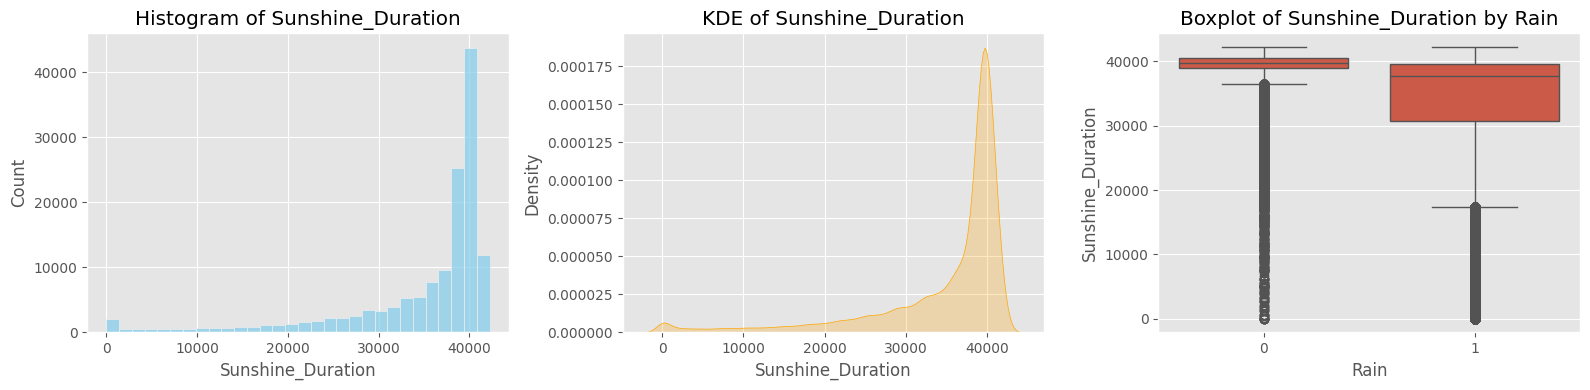

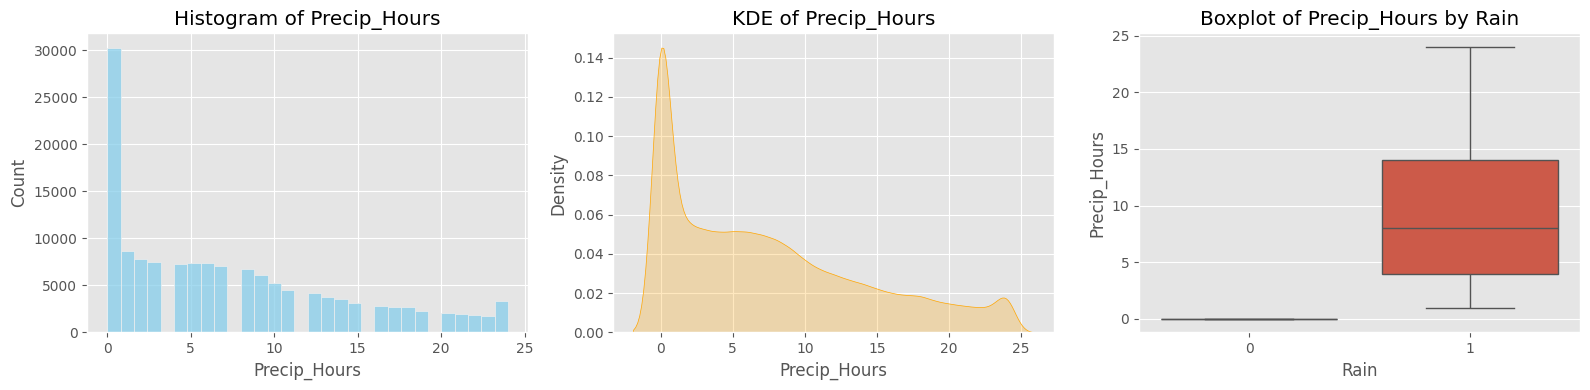

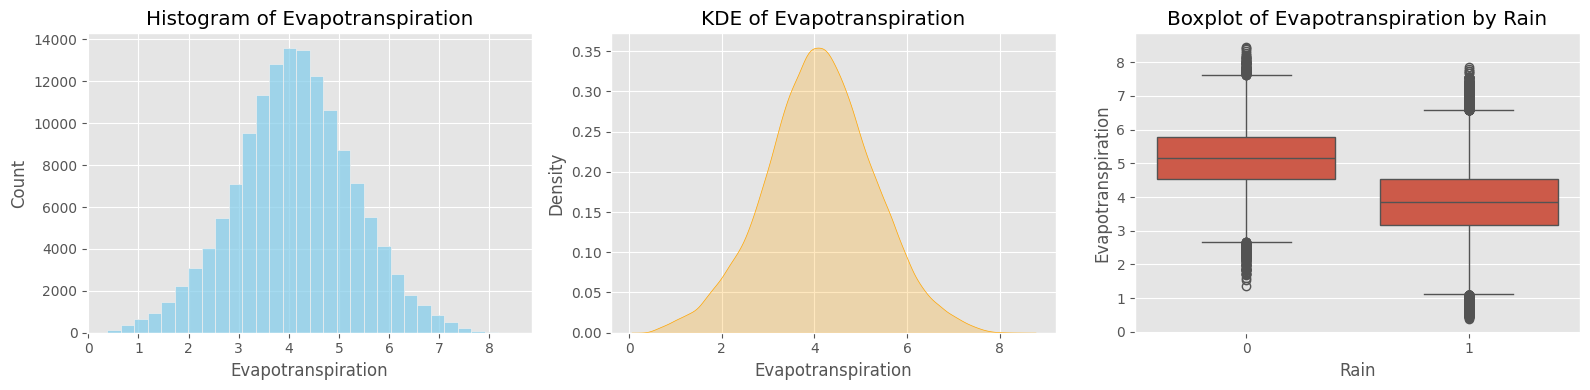

In [108]:
for feature in features_to_analyze:
    plt.figure(figsize=(16, 4))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], bins=30, kde=False, color='skyblue')
    plt.title(f'Histogram of {feature}')
    
    # KDE Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(df[feature], fill=True, color='orange')
    plt.title(f'KDE of {feature}')
    
    # Boxplot (optionally by Rain if exists)
    plt.subplot(1, 3, 3)
    if 'Rain' in df.columns:
        sns.boxplot(x='Rain', y=feature, data=df)
        plt.title(f'Boxplot of {feature} by Rain')
    else:
        sns.boxplot(y=df[feature])
        plt.title(f'Boxplot of {feature}')
    
    plt.tight_layout()
    plt.show()


In [109]:
# Define path to save cleaned data
cleaned_path = "../fc212025 udayanga/clean_data.csv"

# Save to CSV
df.to_csv(cleaned_path, index=False)

# Confirmation
print(f"ðŸ§¼ Cleaned data saved to: {cleaned_path}")


ðŸ§¼ Cleaned data saved to: ../fc212025 udayanga/clean_data.csv
